In [12]:
import tweepy 
import json
import pandas as pd
import numpy as np
from scipy import stats
from operator import itemgetter
import re
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
graph = nx.Graph()


import CREDENTIALS
import sys
sys.path.append("./SentimentAnalysis.py")
from SentimentAnalysis import TwitterClient 
from SentimentAnalysis import TwitterAuthenticator
from SentimentAnalysis import TwitterStreamer
from SentimentAnalysis import TwitterListener
from SentimentAnalysis import TweetAnalyser

In [13]:
twitter_client = TwitterClient()
tweet_analyser = TweetAnalyser()
api = twitter_client.get_twitter_client_api()


# ENTER THE DETAILS

In [28]:
COMPANY = "infosys"
NO_OF_TWEETS = 10

tweets = api.user_timeline(screen_name=COMPANY, count=NO_OF_TWEETS)
graph.add_node(COMPANY)

#tier 1 twitter accounts
tier1 = []
#tier 2 twitter accounts
tier2 = []



retweetsList = []

In [29]:
for tweet in tweets:
    retweets = api.retweets(id=tweet.id, count=100)
    print(len(retweets))
    for retweet in retweets:
#         retweetsList.append([retweet.user.screen_name, int(retweet.user.followers_count)])
        analyse_tweets(retweet, retweet.user.screen_name)
        
        
        
        
        
        
#         print(retweet.user.screen_name, retweet.user.followers_count)
#     print(dir(retweets[0].user))

# analyseRetweets()
# print(nx.info(graph))

0
4
ankit_sawhney ankit_sawhney
jonquilberlin jonquilberlin
dkaush dkaush
imravikumars imravikumars
1
Fly_ux Fly_ux
9
duvvuri_s duvvuri_s
AmanRaj66494403 AmanRaj66494403
balajiucla balajiucla
bharatsthacker bharatsthacker
soniyadashottar soniyadashottar
lalachanka62 lalachanka62
bot_infra bot_infra
saurabhd0605 saurabhd0605
Fly_ux Fly_ux
0
1
Sanchit73083640 Sanchit73083640
11
dhimanm59 dhimanm59
pfersht pfersht
HFSAndyDay HFSAndyDay
InfosysPS InfosysPS
KannanAmaresh KannanAmaresh
sun_walia sun_walia
Muthu_Kumar_08 Muthu_Kumar_08
rockingshanky09 rockingshanky09
kadur_naveen kadur_naveen
Fly_ux Fly_ux
debjani_ghosh_ debjani_ghosh_
1
rameshbishnoi rameshbishnoi


RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

## Recursive function

In [27]:
def analyse_tweets(tweet,name):
    print(tweet.user.screen_name, name)
    followers_count = tweet.user.followers_count
    retweet_count = tweet.retweet_count
    if(followers_count>100 or retweet_count>50):
        graph.add_edge(name, tweet.user.screen_name)
        retweets = api.retweets(id=tweet.id, count=100)
        for node in retweets:
            analyse_tweets(node,tweet.user.screen_name)

## Display The Graph

In [30]:
nx.info(graph)

'Name: \nType: Graph\nNumber of nodes: 19\nNumber of edges: 18\nAverage degree:   1.8947'

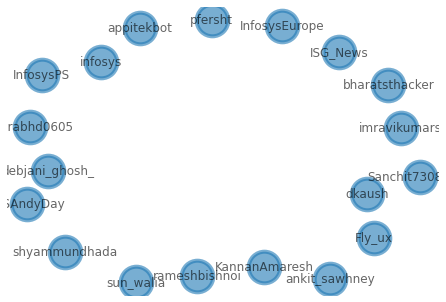

In [31]:
#     labels={}
#     pos = nx.spring_layout(graph, k=0.05)
#     plt.figure(figsize = (35,35))
nx.draw(graph,  cmap=plt.cm.PiYG, edge_color="black", linewidths=4, node_size=1000, alpha=0.6, with_labels=True, arrowsize=1, arrowstyle='fancy')
#     nx.draw_networkx_nodes(graph, pos=pos,node_size=100, alpha=0.9)
#     nx.draw_networkx_labels(graph,pos,labels,font_size=30)
#     # plt.savefig('graphfinal.png')
    
#     plt.figure(figsize = (100,100))
#     nx.draw(graph, with_labels=True, font_weight='bold')

plt.show()
    

## dir(tweet.user)


'contributors_enabled', 'created_at', 'default_profile', 'default_profile_image', 'description', 'entities', 'favourites_count', 'follow', 'follow_request_sent', 'followers', 'followers_count', 'followers_ids', 'following', 'friends', 'friends_count', 'geo_enabled', 'has_extended_profile', 'id', 'id_str', 'is_translation_enabled', 'is_translator', 'lang', 'listed_count', 'lists', 'lists_memberships', 'lists_subscriptions', 'location', 'name', 'notifications', 'parse', 'parse_list', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_banner_url', 'profile_image_url', 'profile_image_url_https', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'protected', 'screen_name', 'statuses_count', 'time_zone', 'timeline', 'translator_type', 'unfollow', 'url', 'utc_offset', 'verified'

## dir(tweets[0])

'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweeted_status', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user'